In [201]:
# 1. Using Python Matplotlib to discuss what you find from the given data or your own data. Please provide source code and visualization results.

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)

In [134]:
netflix_clean_df= pd.read_csv('netflix_clean_data.csv')

In [135]:
netflix_clean_df.head()

,show_id,type,director,cast,country,date_added,rating,duration,listed_in,release_year
0,s1,Movie,Kirsten Johnson,Unknown,United States,2021-09-25,PG-13,90 min,Documentaries,2021.0
1,s2,TV Show,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021.0
2,s3,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021.0
3,s4,TV Show,Unknown,Unknown,Unknown,2021-09-24,TV-MA,1 Season,"Docuseries, Reality TV",2021.0
4,s5,TV Show,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021.0


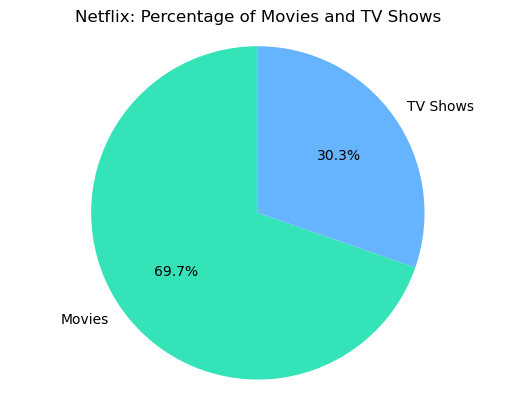

In [136]:
# Pie chart to display Percentage of total Movies and TV Shows on Netflix using matplotlib
movies = (netflix_clean_df['type'] == 'Movie').sum()
tv_shows = (netflix_clean_df['type'] == 'TV Show').sum()
labels = ['Movies', 'TV Shows']
sizes = [movies, tv_shows]
colors = ['#34e3b7','#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Netflix: Percentage of Movies and TV Shows')
plt.axis('equal')
plt.show()

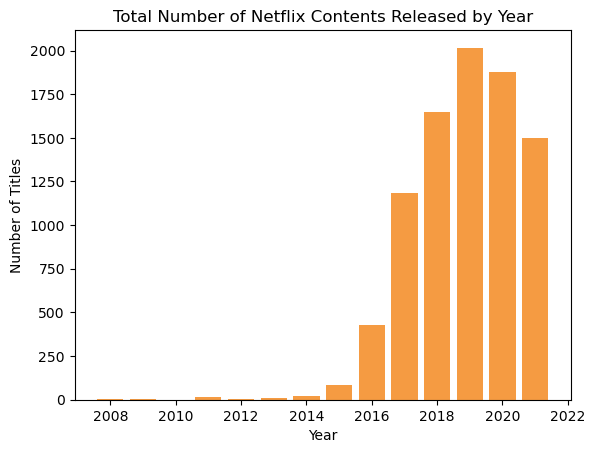

In [137]:
#Bar chart to display number of contents released by year
netflix_clean_df['release_year'] = pd.to_datetime(netflix_clean_df['release_year'], format='%Y')
contents_by_year = netflix_clean_df.groupby(netflix_clean_df['release_year'].dt.year)['show_id'].count()
plt.bar(contents_by_year.index, contents_by_year.values,color='#f59b42')
plt.title('Total Number of Netflix Contents Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

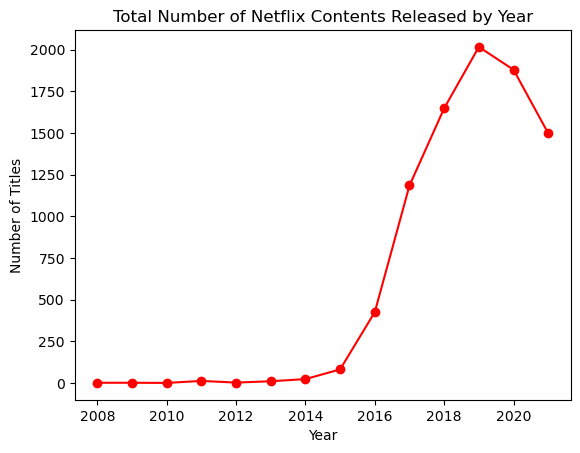

In [138]:
# Number of contents released by year in line plot
plt.plot(contents_by_year.index, contents_by_year.values, color='red', marker='o')
plt.title('Total Number of Netflix Contents Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

In [139]:
# Which Country released more TV shows 
tv_shows = netflix_clean_df[netflix_clean_df['type'] == 'TV Show']
tv_shows_by_country = tv_shows.groupby('country').size().reset_index(name='count')
tv_shows_by_country = tv_shows_by_country.sort_values('count', ascending=False).head(10)
tv_shows_by_country

,country,count
160,United States,754
195,Unknown,390
140,United Kingdom,212
83,Japan,167
120,South Korea,158
66,India,79
132,Taiwan,68
17,Canada,59
47,France,49
125,Spain,48


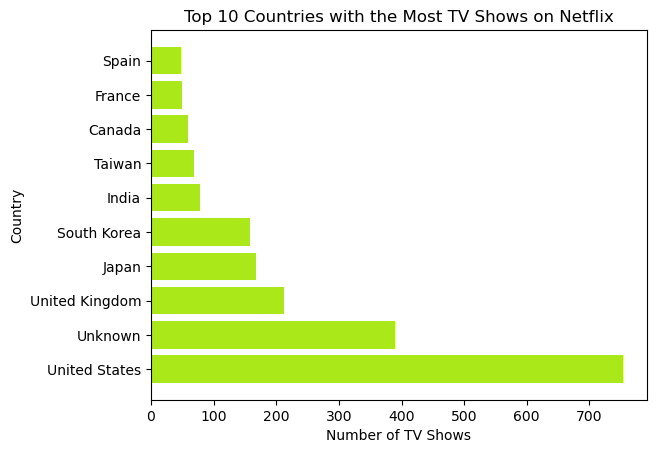

In [140]:
# Horizontal bar chart to display top 10 countries which has most tv shows
plt.barh(tv_shows_by_country['country'], tv_shows_by_country['count'], color='#aae81a')
plt.xlabel('Number of TV Shows')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Most TV Shows on Netflix')
plt.show()

In [141]:
# Which Country has most Movies
movies = netflix_clean_df[netflix_clean_df['type'] == 'Movie']
movies_by_country = movies.groupby('country').size().reset_index(name='count')
movies_by_country = movies_by_country.sort_values('count',ascending=False).head(10)
movies_by_country

,country,count
525,United States,2055
218,India,893
640,Unknown,439
440,United Kingdom,206
50,Canada,122
384,Spain,97
128,Egypt,92
319,Nigeria,86
238,Indonesia,77
278,Japan,76


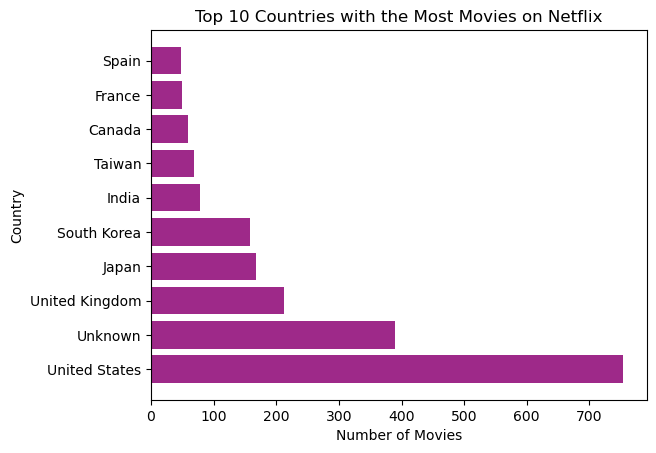

In [142]:
# Horizontal bar chart to display top 10 countries which has more movies
plt.barh(tv_shows_by_country['country'], tv_shows_by_country['count'], color='#9e2989')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Most Movies on Netflix')
plt.show()

In [143]:
# the number of movies and TV shows in the top 10 countries
titles_by_country = netflix_clean_df.groupby(['country', 'type']).size().reset_index(name='count')
top_countries = titles_by_country.groupby('country').sum().sort_values('count', ascending=False).head(10)
top_countries = top_countries.reset_index()['country'].tolist()
titles_by_country = titles_by_country[titles_by_country['country'].isin(top_countries)]
movies = titles_by_country[titles_by_country['type'] == 'Movie'].reset_index(drop=True)
tv_shows = titles_by_country[titles_by_country['type'] == 'TV Show'].reset_index(drop=True)
titles_by_country

,country,type,count
67,Canada,Movie,122
68,Canada,TV Show,59
184,France,Movie,75
185,France,TV Show,49
284,India,Movie,893
285,India,TV Show,79
361,Japan,Movie,76
362,Japan,TV Show,167
389,Mexico,Movie,70
390,Mexico,TV Show,40


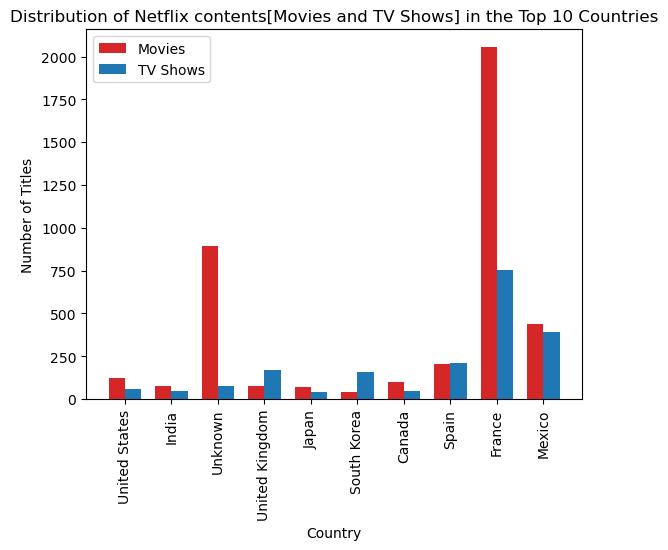

In [144]:
# Grouped bar chart showing the number of movies and TV shows in the top 10 countries using matplotlib
fig, ax = plt.subplots()
width = 0.35
ax.bar(movies.index - width/2, movies['count'], width, label='Movies',color='tab:red')
ax.bar(tv_shows.index + width/2, tv_shows['count'], width, label='TV Shows',color='tab:blue')
ax.set_xticks(range(len(top_countries)))
ax.set_xticklabels(top_countries)
plt.xticks(rotation=90)
ax.set_xlabel('Country')
ax.set_ylabel('Number of Titles')
ax.set_title('Distribution of Netflix contents[Movies and TV Shows] in the Top 10 Countries')
ax.legend()
plt.show()

In [145]:
# the number of movies and TV shows by release_year
netflix_clean_df['date_added'] = pd.to_datetime(netflix_clean_df['date_added'])
netflix_clean_df['release_year'] = netflix_clean_df['date_added'].dt.year.astype(float).astype(int)
grouped_contents = netflix_clean_df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
grouped_contents

type,Movie,TV Show
release_year,,
2008,1,1
2009,2,0
2010,1,0
2011,13,0
2012,3,0
2013,6,5
2014,19,5
2015,56,26
2016,251,175


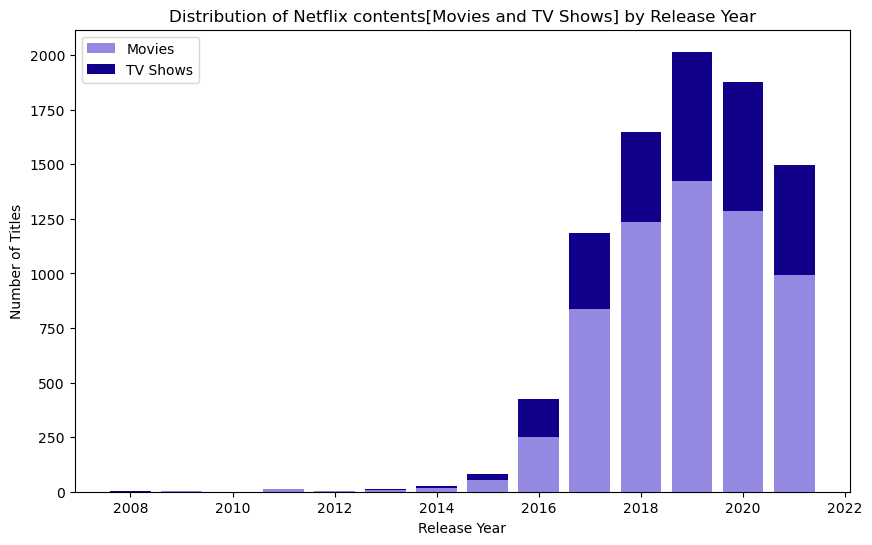

In [146]:
# Stacked bar chart showing the number of movies and TV shows by release year
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(grouped_contents.index, grouped_contents['Movie'], label='Movies', color='#9389e0')
ax.bar(grouped_contents.index, grouped_contents['TV Show'], bottom=grouped_contents['Movie'], label='TV Shows', color='#11018a')
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of Titles')
ax.set_title('Distribution of Netflix contents[Movies and TV Shows] by Release Year')
ax.legend()
plt.show()

In [147]:
# Total number of ratings for available types
ratings_grouped = netflix_clean_df.groupby(['type'])['rating'].count()
ratings_grouped

type
Movie      6126
TV Show    2664
Name: rating, dtype: int64

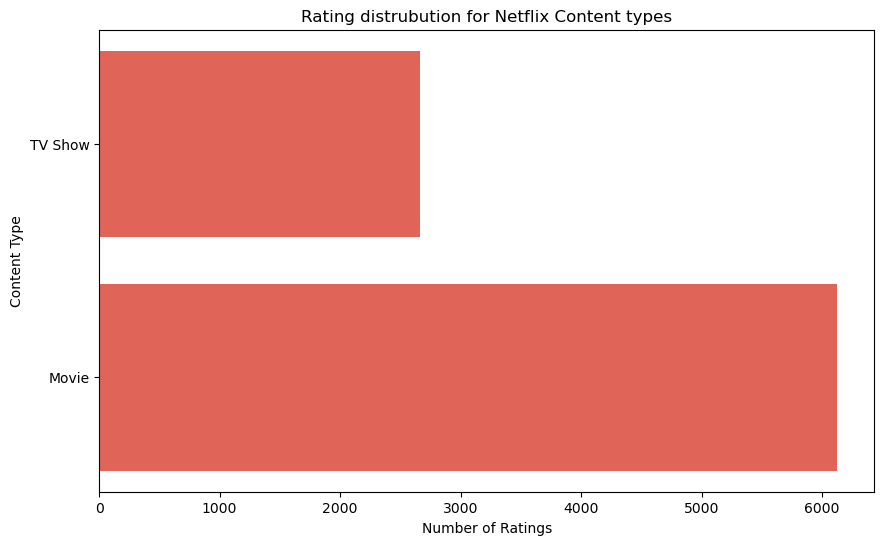

In [148]:
# Horizontal bar chart to display total number of ratings for each type(Movies/TV Shows)
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(ratings_grouped.index, ratings_grouped.values, color='#e06558')
ax.set_xlabel('Number of Ratings')
ax.set_ylabel('Content Type')
ax.set_title('Rating distrubution for Netflix Content types')
plt.show()

In [149]:
# Total number of contents for each rating
ratings_count = netflix_clean_df['rating'].value_counts()
ratings_count

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

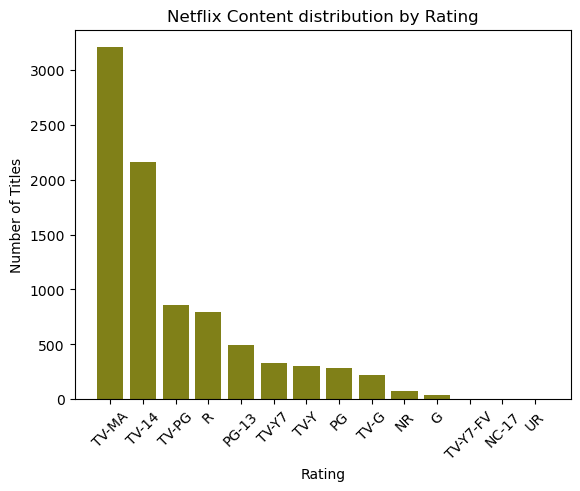

In [150]:
# Bar chart to display total number of contents available in netflix for each rating
fig, ax = plt.subplots()
ax.bar(ratings_counts.index, ratings_counts.values, color='#808018')
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Titles')
ax.set_title('Netflix Content distribution by Rating')
plt.xticks(rotation=45)
plt.show()

In [151]:
# total number of movies in top 10 genre
movies = netflix_clean_df[netflix_clean_df['type'] == 'Movie']
genre_count_movie = movies['listed_in'].str.split(', ').explode().value_counts()[:10]
genre_count_movie

International Movies        2752
Dramas                      2426
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Name: listed_in, dtype: int64

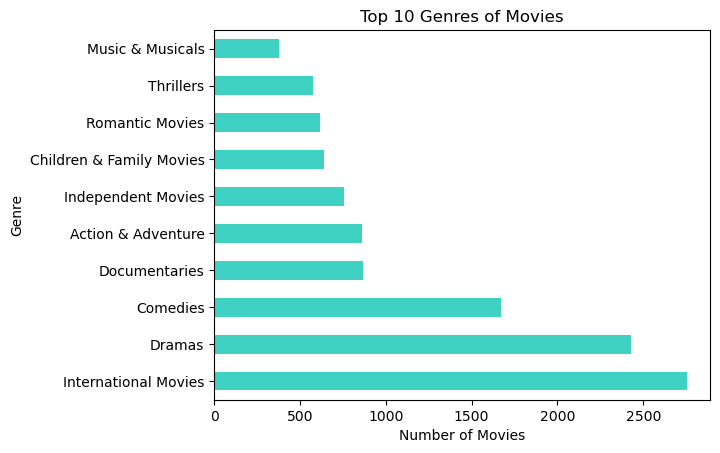

In [123]:
# Horizontal bar chart showing the top 10 genres of movies
fig, ax = plt.subplots()
genre_count_movie.plot(kind='barh', color='#3fd1c2')
ax.set_xlabel('Number of Movies')
ax.set_ylabel('Genre')
ax.set_title('Top 10 Genres of Movies')
plt.show()

In [152]:
# total number of tv shows in top 10 genre
tv_shows = netflix_clean_df[netflix_clean_df['type'] == 'TV Show']
genre_count_tvshow = tv_shows['listed_in'].str.split(', ').explode().value_counts()[:10]
genre_count_tvshow

International TV Shows    1349
TV Dramas                  762
TV Comedies                573
Crime TV Shows             469
Kids' TV                   448
Docuseries                 394
Romantic TV Shows          370
Reality TV                 255
British TV Shows           252
Anime Series               174
Name: listed_in, dtype: int64

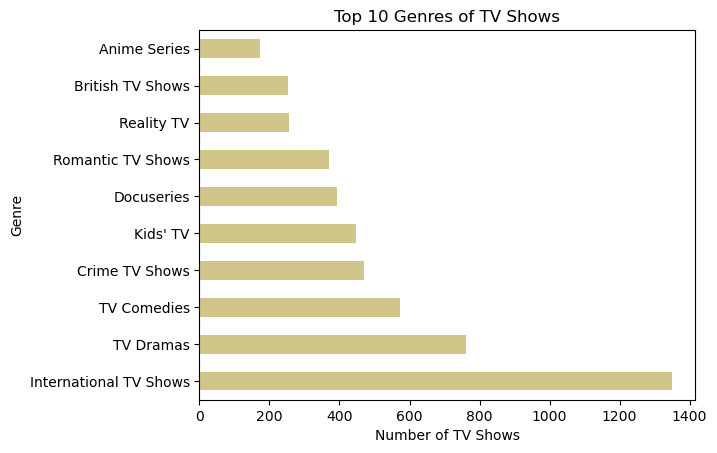

In [153]:
# Horizontal bar chart showing the top 10 genres of tv shows
fig, ax = plt.subplots()
genre_count_tvshow.plot(kind='barh', color='#d1c68a')
ax.set_xlabel('Number of TV Shows')
ax.set_ylabel('Genre')
ax.set_title('Top 10 Genres of TV Shows')
plt.show()

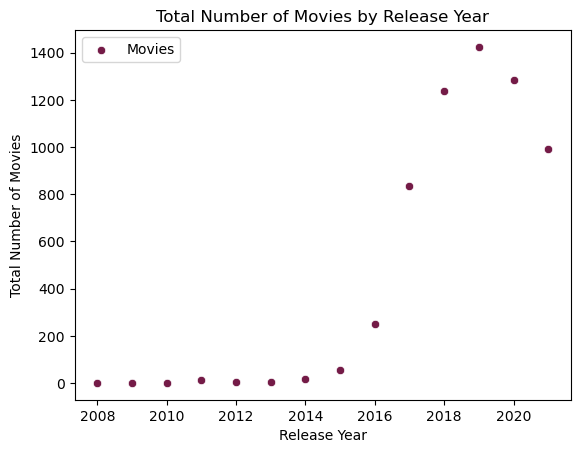

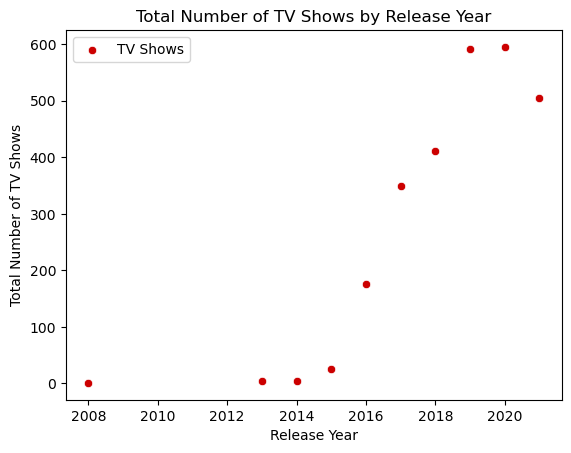

In [154]:
# scatter plots showing the total number of shows by release year
movies = netflix_clean_df[netflix_clean_df['type'] == 'Movie']
movies_by_year = movies.groupby(['release_year'])['show_id'].count().reset_index()
movies_by_year.columns = ['year', 'total']
tv_shows = netflix_clean_df[netflix_clean_df['type'] == 'TV Show']
tv_shows_by_year = tv_shows.groupby(['release_year'])['show_id'].count().reset_index()
tv_shows_by_year.columns = ['year', 'total']

sns.scatterplot(x='year', y='total', data=movies_by_year, label='Movies', color='#741B47')
plt.title('Total Number of Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Total Number of Movies')
plt.show()

sns.scatterplot(x='year', y='total', data=tv_shows_by_year, label='TV Shows', color='#CC0000')
plt.title('Total Number of TV Shows by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Total Number of TV Shows')
plt.show()


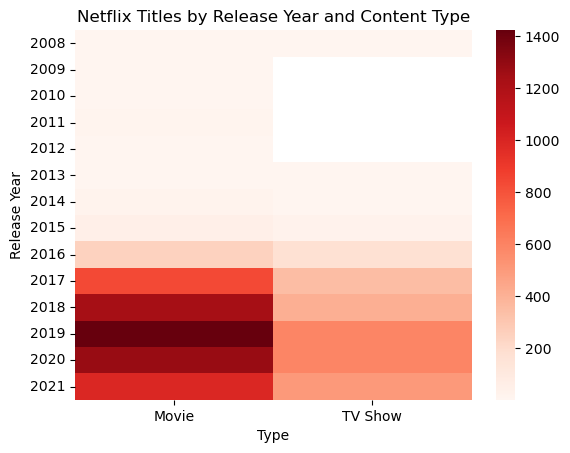

In [132]:
# heatmap for number of titles released by Netflix for each year and type(movies/tv shows).
year_type_df = netflix_clean_df.groupby(['release_year', 'type']).size().unstack()
sns.heatmap(year_type_df, cmap='Reds')
plt.title('Netflix Titles by Release Year and Content Type')
plt.xlabel('Type')
plt.ylabel('Release Year')
plt.show()